# WeatherPy
----

### Analysis
* In the submitted production notebook, 632 randomly generated lat/long combinations, worldwide, where matched to nearby cities via the citipy library.  The initial set of 617 cities was queried against the OpenWeather API in order to collect current (10/12/2018) weather conditions.  A total of 573 city queries returned valid, current weather data.  

* Maximum daily temperature for cities closer to the equator (latitude = 0 degrees) group higher than for cities further from the equator (shown by zero minus or zero plus latitude values on the X axis).  At the time of data collection from OpenWeather on the collection date, cities within the band of latitudes between +20 and -20 showed a grouping of temperatures significantly higher than those outside the +20/-20 band of cities.  Cities with latitudes approaching and only slightly exceeding +20 or -20 showed high temperature groupings that should be studied seperately with an eye on seasonal/hemishperic norms.  It should be noted that the effects of elevation and proximity to significant open water is not considered in this analysis.

* Visually, there appears to be no significant relationship between the measures of cloudiness and humidity and the latitude of a city. Significant groupings do exist at certain, round number measures of these attributes, a phenomena most likely created by certain process rules for the categorization of these measures.

* Further study is warranted with additional, longitudinal observations and the introduction of elevation, proximity to open water, and prevailing wind data.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
at_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# prep writer for csv output -- test local cities.csv first
#with open('cities.csv', 'w') as cities:
#          writer = csv.writer(cities)
#          writer.writerow('')
# Identify nearest city for each lat, lng combination
    
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list 
    if city not in cities:
        cities.append(city)

#len(cities)
cities_len = len(cities)
cities_len

632

In [6]:
# create cities_trunc n=10 for testing
cities_trunc = cities[:10]
len(cities_trunc)
ct_len = len(cities_trunc)
ct_len

10

In [7]:
# check cities via cities_trunc list
for city in cities_trunc:
    print(city)

vila franca do campo
busselton
butaritari
punta arenas
albany
eyl
hasaki
baoding
cape town
okakarara


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# build request query with url, units, api key then iterate through [cities] to generate response

# create empty lists for response data

city_ow = []
cloudiness_pct = []
country = []
date = []
humidity_pct = []
lat_ow = []
lon_ow = []
max_temp = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

count = 1
for city in cities:
    
    # Build query URL and request
    response = requests.get(query_url + city).json()
    try:
        # append list values with try statement for fail
        city_ow.append(response['name'])
        cloudiness_pct.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity_pct.append(response['main']['humidity'])
        lat_ow.append(response['coord']['lat'])
        lon_ow.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record: {count} of {cities_len} | {city}")
    except:
        print(f"Failed to Find Rec: {count} of {cities_len} | {city}")
    count = count+1

Processing Record: 1 of 632 | vila franca do campo
Processing Record: 2 of 632 | busselton
Processing Record: 3 of 632 | butaritari
Processing Record: 4 of 632 | punta arenas
Processing Record: 5 of 632 | albany
Processing Record: 6 of 632 | eyl
Processing Record: 7 of 632 | hasaki
Processing Record: 8 of 632 | baoding
Processing Record: 9 of 632 | cape town
Processing Record: 10 of 632 | okakarara
Processing Record: 11 of 632 | san patricio
Processing Record: 12 of 632 | roros
Processing Record: 13 of 632 | hobart
Processing Record: 14 of 632 | avarua
Processing Record: 15 of 632 | saskylakh
Processing Record: 16 of 632 | abbeyfeale
Processing Record: 17 of 632 | flinders
Processing Record: 18 of 632 | beitbridge
Processing Record: 19 of 632 | baillif
Processing Record: 20 of 632 | goderich
Processing Record: 21 of 632 | sheridan
Processing Record: 22 of 632 | bredasdorp
Processing Record: 23 of 632 | lagoa
Processing Record: 24 of 632 | vaini
Processing Record: 25 of 632 | rio brilha

Processing Record: 201 of 632 | margate
Processing Record: 202 of 632 | princeton
Failed to Find Rec: 203 of 632 | borama
Processing Record: 204 of 632 | fukue
Processing Record: 205 of 632 | birjand
Processing Record: 206 of 632 | serenje
Failed to Find Rec: 207 of 632 | kuva
Processing Record: 208 of 632 | longfeng
Processing Record: 209 of 632 | dikson
Processing Record: 210 of 632 | wencheng
Processing Record: 211 of 632 | umm kaddadah
Processing Record: 212 of 632 | altay
Processing Record: 213 of 632 | kieta
Processing Record: 214 of 632 | benavente
Processing Record: 215 of 632 | vidim
Processing Record: 216 of 632 | kuopio
Processing Record: 217 of 632 | barcelona
Processing Record: 218 of 632 | havre-saint-pierre
Processing Record: 219 of 632 | saint-pierre
Processing Record: 220 of 632 | morant bay
Processing Record: 221 of 632 | shenjiamen
Failed to Find Rec: 222 of 632 | asau
Processing Record: 223 of 632 | nioro
Processing Record: 224 of 632 | beyneu
Processing Record: 225

Processing Record: 403 of 632 | horodnytsya
Processing Record: 404 of 632 | beni
Processing Record: 405 of 632 | bulgan
Processing Record: 406 of 632 | saint-augustin
Processing Record: 407 of 632 | nantucket
Processing Record: 408 of 632 | belaya gora
Processing Record: 409 of 632 | zharkent
Processing Record: 410 of 632 | tilichiki
Processing Record: 411 of 632 | maple creek
Processing Record: 412 of 632 | kalabo
Processing Record: 413 of 632 | carutapera
Processing Record: 414 of 632 | lima
Processing Record: 415 of 632 | huarmey
Processing Record: 416 of 632 | alofi
Processing Record: 417 of 632 | tual
Processing Record: 418 of 632 | atasu
Processing Record: 419 of 632 | binzhou
Processing Record: 420 of 632 | nuuk
Processing Record: 421 of 632 | trinidad
Failed to Find Rec: 422 of 632 | vicuna
Processing Record: 423 of 632 | trelew
Processing Record: 424 of 632 | pella
Processing Record: 425 of 632 | san quintin
Processing Record: 426 of 632 | mingshui
Processing Record: 427 of 63

Processing Record: 603 of 632 | iqaluit
Processing Record: 604 of 632 | srednekolymsk
Processing Record: 605 of 632 | sibolga
Processing Record: 606 of 632 | sangar
Processing Record: 607 of 632 | rafraf
Processing Record: 608 of 632 | lao cai
Processing Record: 609 of 632 | pacific grove
Processing Record: 610 of 632 | koslan
Processing Record: 611 of 632 | ashdod
Failed to Find Rec: 612 of 632 | linchuan
Failed to Find Rec: 613 of 632 | grand river south east
Processing Record: 614 of 632 | vardo
Failed to Find Rec: 615 of 632 | palabuhanratu
Processing Record: 616 of 632 | shilovo
Processing Record: 617 of 632 | humaita
Failed to Find Rec: 618 of 632 | ambodifototra
Failed to Find Rec: 619 of 632 | falealupo
Processing Record: 620 of 632 | paragominas
Processing Record: 621 of 632 | bodden town
Processing Record: 622 of 632 | vostok
Processing Record: 623 of 632 | komsomolsk
Processing Record: 624 of 632 | camacari
Processing Record: 625 of 632 | varhaug
Processing Record: 626 of 63

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create data dictionary, create df from dictionary
weather_dict = {
      "City": city_ow,
      "Cloudiness": cloudiness_pct,
      "Country": country,
      "Date": date,
      "Humidity": humidity_pct,
      "Lat": lat_ow,
      "Lng": lon_ow,
      "Max Temp": max_temp,
      "Wind Speed": wind_speed
}        
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vila Franca do Campo,75,PT,1539354600,93,37.72,-25.43,66.20,14.99
1,Busselton,44,AU,1539356293,100,-33.64,115.35,59.14,6.17
2,Butaritari,48,KI,1539356293,100,3.07,172.79,80.73,6.73
3,Punta Arenas,75,CL,1539352800,61,-53.16,-70.91,46.40,17.22
4,Albany,90,US,1539355620,65,42.65,-73.75,53.96,16.11


In [10]:
weather_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,573.000000,5.730000e+02,573.000000,573.000000,573.000000,573.000000,573.000000
mean,43.994764,1.539355e+09,73.307155,20.928168,15.701414,61.525288,8.520873
std,35.897119,1.553665e+03,22.739554,32.722995,89.272914,21.042876,5.562040
min,0.000000,1.539352e+09,8.000000,-54.810000,-179.170000,-3.510000,0.130000
25%,1.000000,1.539354e+09,61.000000,-5.810000,-64.500000,46.400000,4.380000
50%,40.000000,1.539356e+09,77.000000,27.510000,17.460000,64.710000,6.930000
75%,76.000000,1.539356e+09,93.000000,48.090000,97.530000,78.800000,11.410000
max,100.000000,1.539357e+09,100.000000,78.220000,179.320000,103.500000,28.860000


In [11]:
weather_data_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [19]:
# export weather_data_df data to csv (same folder as notebook)

weather_data_df.to_csv('weather_out.csv', encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

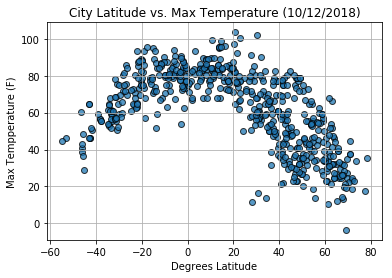

In [13]:
# Plot #1 -- Lat x Temp. use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Max Temp'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 0.5)
plt.title("City Latitude vs. Max Temperature (10/12/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Max Tempperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

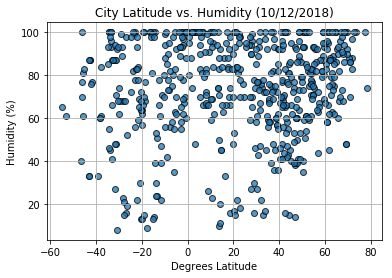

In [14]:
# Plot #2, Lat x Humidity.  use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 1.0)
plt.title("City Latitude vs. Humidity (10/12/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

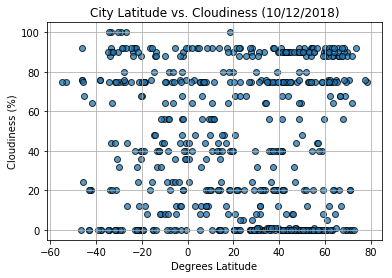

In [15]:
# Plot #3, Lat x Cloudiness.  use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 1.0)
plt.title("City Latitude vs. Cloudiness (10/12/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

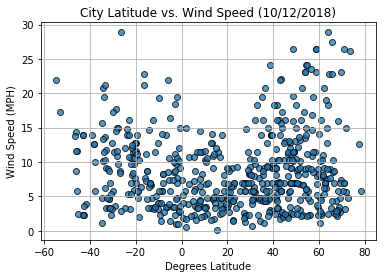

In [16]:
# Plot #4, Lat x Wind Speed.  use plt. functions to create and control plot line by line
plt.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 1.0)
plt.title("City Latitude vs. Wind Speed (10/12/2018)")
plt.xlabel("Degrees Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.show()